In [325]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

In [326]:
# read data
rheas_province=pd.read_csv('data/rheas/zambia_rheas_province_data_clean.csv')
rheas_district=pd.read_csv('data/rheas/zambia_rheas_district_data_clean.csv')
preharvest_district=pd.read_csv('data/preharvest/zambia_preharvest_district_data_clean.csv')
preharvest_province=pd.read_csv('data/preharvest/zambia_preharvest_province_data_clean.csv')
postharvest_province=pd.read_csv('data/postharvest/zambia_postharvest_province_data_clean.csv')


In [327]:
# BIAS district data with districtcorrect rheas output
district_metrics=pd.read_csv('data/metrics/preharvest_rheas_district_metrics.csv')
post_province_metrics=pd.read_csv('data/postharvest_rheas_province_level_metrics.csv')
pre_province_metrics=pd.read_csv('data/preharvest_rheas__province_metrics.csv')

In [328]:
# Bias correct rheas with the preharvest district-level

rheas_district['yield']=pd.to_numeric(rheas_district['yield'])
district_metrics['bias']=pd.to_numeric(district_metrics['bias'])
# rheas_district1=df2
df10=[]
# # rheas_district
for d in list(district_metrics.district.unique()):
    df7=rheas_district.loc[rheas_district['district']==d]
    df8=(district_metrics.loc[district_metrics['district']==d]).reset_index()
    for y in list(rheas_district.season_year.unique()):
        df9=(df7.loc[df7['season_year']==y].copy()).reset_index()
        df9['yield_bias']=df9['yield']-df8['bias']
        #  df9['yield_bias'] = df9['yield'].sub(df8['bias'], fill_value=0)
        df10.append(df9)
df11=pd.concat(df10, axis=0, ignore_index=True)
rheas_corrected=df11
rheas_corrected.to_csv('data/rheas/rheas_preharvest_district_corrected.csv', index=False)
rheas_corrected

,index,district,season_year,yield,zyield,flag,yield_bias
0,1584,mazabuka,1999,4.270373,1.480897,0,3.075948
1,1585,mazabuka,2000,4.109240,0.599819,0,2.914814
2,1586,mazabuka,2001,4.319210,1.747937,0,3.124784
3,1587,mazabuka,2002,4.065700,0.361742,0,2.871274
4,1588,mazabuka,2003,4.203730,1.116491,0,3.009304
...,...,...,...,...,...,...,...
1771,1723,mongu,2018,3.656180,-2.023404,1,0.770281
1772,1724,mongu,2019,3.957830,-0.360359,0,1.071931
1773,1725,mongu,2020,4.138030,0.633113,0,1.252131
1774,1726,mongu,2021,3.935310,-0.484515,0,1.049411


In [329]:
# # Bias correct rheas with the preharvest province level
dff_prov1=[]
# # # rheas_district
for d in list(preharvest_province.province_b.unique()):
    dfff7=rheas_province.loc[rheas_province['province_b']==d]
    dfff8=(pre_province_metrics.loc[pre_province_metrics['province']==d]).reset_index()
    for y in list(rheas_province.year.unique()):
        dfff9=(dfff7.loc[dfff7['year']==y].copy()).reset_index()
        dfff9['yield_bias']=dfff9['yield']-dfff8['bias']
        dff_prov1.append(dfff9)
dfff11=pd.concat(dff_prov1, axis=0, ignore_index=True)
# list(rheas_district1.season_year.unique())

rheas_province

# preharvest_province
# postharvest_province
post_province_metrics
rheas_pre_prov_corrected=dfff11
# save
rheas_pre_prov_corrected.to_csv("data/rheas/rheas_preharvest_province_corrected.csv", index=False)

In [330]:
# # Bias correct rheas with the postharvest province level
df_prov1=[]
# # # rheas_district
for d in list(postharvest_province.province.unique()):
    dff7=rheas_province.loc[rheas_province['province_b']==d]
    dff8=(post_province_metrics.loc[post_province_metrics['province']==d]).reset_index()
    for y in list(rheas_province.year.unique()):
        dff9=(dff7.loc[dff7['year']==y].copy()).reset_index()
        dff9['yield_bias']=dff9['yield']-dff8['bias']
        df_prov1.append(dff9)
dff11=pd.concat(df_prov1, axis=0, ignore_index=True)
# list(rheas_district1.season_year.unique())

rheas_province

# preharvest_province
# postharvest_province
post_province_metrics
rheas_post_prov_corrected=dff11
rheas_post_prov_corrected
rheas_post_prov_corrected.to_csv('data/rheas/rheas_postharvest_province_corrected.csv', index=True)

In [331]:
# district level data
# aggregate

In [332]:
# get only data years matching those of preharvest_district
pre_district=[]
for y in list(preharvest_district.year.unique()):
    rheas_years=rheas_corrected.loc[rheas_corrected['season_year']==y].copy()
    pre_district.append(rheas_years)
rheas_preharvest_years=pd.concat(pre_district, ignore_index=True)
rheas_preharvest_years
# for rheas original
pre_district1=[]
for y in list(preharvest_district.year.unique()):
    rheas_years2=rheas_district.loc[rheas_district['season_year']==y].copy()
    pre_district1.append(rheas_years2)
rheas_preharvest_years1=pd.concat(pre_district1, ignore_index=True)
rheas_preharvest_years1

,district,season_year,yield,zyield,flag
0,chadiza,2011,4.18547,1.062191,0
1,chama,2011,4.17417,0.895133,0
2,chasefu,2011,4.17112,0.953103,0
3,chavuma,2011,4.25511,1.311084,0
4,chembe,2011,4.19627,1.045223,0
...,...,...,...,...,...
1387,sioma,2022,3.56257,-2.520910,1
1388,solwezi,2022,3.53090,-2.678913,2
1389,vubwi,2022,3.64664,-2.348601,1
1390,zambezi,2022,3.52642,-2.583288,2


In [333]:

rheas_district1=rheas_preharvest_years1.groupby(['season_year'],as_index=False).agg({'yield':'mean'})
preharvest_district1=preharvest_district.groupby(['year'],as_index=False).agg({'yield':'mean'})

In [334]:
# aggregate district level
rheas_district1=rheas_preharvest_years1.groupby(['season_year'],as_index=False).agg({'yield':'mean'})
rheas_corrected1=rheas_preharvest_years.groupby(['season_year'],as_index=False).agg({'yield_bias':'mean'})
preharvest_district1=preharvest_district.groupby(['year'],as_index=False).agg({'yield':'mean'})



In [335]:
# province level data

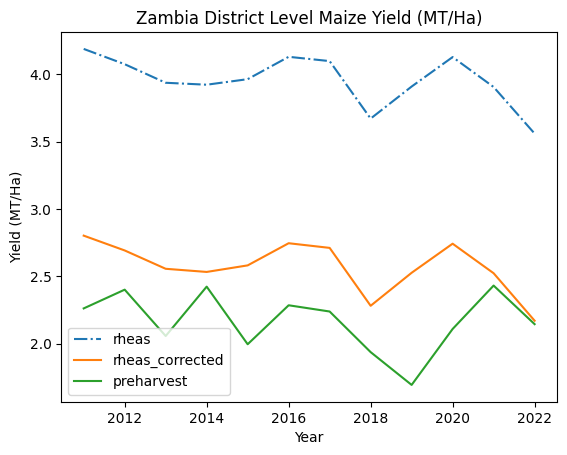

In [336]:
#plot data by district yearly 
# aggregate province level

#Plot 
x11 =rheas_district1['season_year']
y11 =rheas_district1['yield']
x22=rheas_corrected1['season_year']
y22 =rheas_corrected1['yield_bias']
x33 =preharvest_district1['year']
y33=preharvest_district1['yield']
# x44 =rheas_corrected1['season_year']
# y44 =rheas_corrected1['yield_bias']
# Plotting for 2005-2005
plt.plot(x11, y11, '-.', label='rheas')
plt.plot(x22, y22, '-', label='rheas_corrected')
plt.plot(x33, y33, '', label='preharvest')
# plt.plot(x44, y44, '', label='rheas_corrected')
plt.xlabel("Year")
plt.ylabel("Yield (MT/Ha)")
plt.title('Zambia District Level Maize Yield (MT/Ha)')
plt.legend()
plt.show()

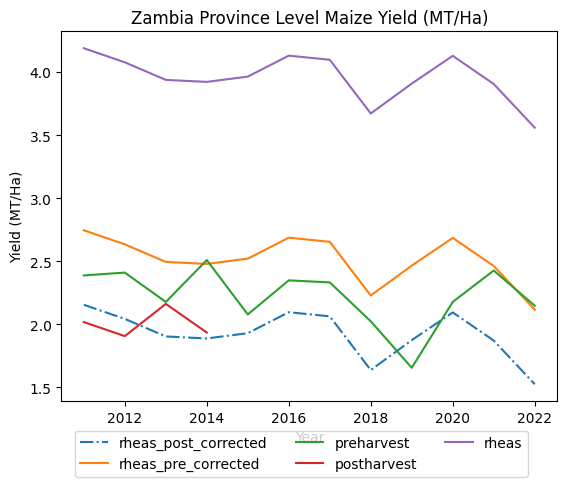

In [348]:
#plot data by province yearly 
#PLOT THE RHEAS, preharvest and post corrected province_level surveys data
# aggregate first
rheas_pre_prov_corrected=rheas_pre_prov_corrected.groupby(['year'],as_index=False).agg({'yield_bias':'mean'})
rheas_post_prov_corrected=rheas_post_prov_corrected.groupby(['year'],as_index=False).agg({'yield_bias':'mean'})
preharvest_province=preharvest_province.groupby(['year'],as_index=False).agg({'yield':'mean'})
rheas_province=rheas_province.groupby(['year'],as_index=False).agg({'yield':'mean'})
postharvest_province=postharvest_province.groupby(['year'],as_index=False).agg({'yield':'mean'})

# # extract rheas merging preharvest
##post corrected rheas
pre_prov=[]
for y in list(preharvest_district.year.unique()):
    rrrheas_years2=rheas_pre_prov_corrected.loc[rheas_pre_prov_corrected['year']==y].copy()
    pre_prov.append(rrrheas_years2)
dfffff=pd.concat(pre_prov, ignore_index=True)
rheas_pre_prov_corrected=dfffff

# # postharvest corrected rheas
prost_list=[]
for y in list(preharvest_district.year.unique()):
    rrheas_years2=rheas_post_prov_corrected.loc[rheas_post_prov_corrected['year']==y].copy()
    prost_list.append(rrheas_years2)
rrheas_post_corrected=pd.concat(prost_list, ignore_index=True)
rheas_post_prov_corrected=rrheas_post_corrected

# rheas


pprost_list=[]
for y in list(preharvest_district.year.unique()):
    rrrheas=rheas_province.loc[rheas_province['year']==y].copy()
    pprost_list.append(rrrheas)
rrrheas=pd.concat(pprost_list, ignore_index=True)

rheas_province=rrrheas
# #Plot 
x111 =rheas_post_prov_corrected['year']
y111 =rheas_post_prov_corrected['yield_bias']
x222=rheas_pre_prov_corrected['year']
y222 =rheas_pre_prov_corrected['yield_bias']
x333 =preharvest_province['year']
y333=preharvest_province['yield']
x444 =postharvest_province['year']
y444=postharvest_province['yield']
x555 =rheas_province['year']
y555=rheas_province['yield']

# # Plotting for 2005-2005
plt.plot(x111, y111, '-.', label='rheas_post_corrected')
plt.plot(x222, y222, '-', label='rheas_pre_corrected')
plt.plot(x333, y333, '', label='preharvest')
plt.plot(x444, y444, '', label='postharvest')
plt.plot(x555, y555, '', label='rheas')
plt.xlabel("Year")
plt.ylabel("Yield (MT/Ha)")
plt.title('Zambia Province Level Maize Yield (MT/Ha)')
# plt.legend(loc='center right')
plt.legend(bbox_to_anchor=(0.5,0), ncol=3, loc='center', bbox_transform=plt.gcf().transFigure)


plt.show()

In [250]:
#Plotting line graphs for the entire country
#First is to aggregate data for the entire country
# rheas_data=rheas_model_province.groupby(['year'], as_index=False).agg({'yield':'mean'})
# zambia_model_data=zambia_model_province.groupby(['year'], as_index=False).agg({'yield':'mean'})
# zambia_moa_data=zambia_moa.groupby(['year'], as_index=False).agg({'yield':'mean'})

# rheas_data=rheas_data.loc[(rheas_data['year']>=2012) & (rheas_data['year']<=2012)]
# zambia_model_data=zambia_model_data.loc[(zambia_model_data['year']>=2012) & (zambia_model_data['year']<=2012)]
# zambia_moa_data=zambia_moa_data.loc[(zambia_moa_data['year']>=2012) & (zambia_moa_data['year']<=2012)]
# df=pd.concat([rheas_data, zambia_model_data, zambia_moa_data], axis=0)

read the 

In [251]:
#Plotting data for 2000-2005
# rheas_2000_2005=rheas_data.loc[(rheas_data['year']>=2000) & (rheas_data['year']<=2005)]
# zambia_model_2000_2005=zambia_model_data.loc[(zambia_model_data['year']>=2000) & (zambia_model_data['year']<=2005)]
# x1 =rheas_2000_2005['year']
# y1 =rheas_2000_2005['yield']
# x2=zambia_model_2000_2005['year']
# y2 =zambia_model_2000_2005['yield']

# rheas_2000_2005
# #Plotting for 2005-2005
# plt.plot(x1, y1, '-', label='RHEAS Model')
# plt.plot(x2, y2, '-', label='Zambia Model')
# plt.xlabel("Year")
# plt.ylabel("Yield (MT/Ha)")
# plt.title('Zambia Maize Yield for 2000-2005')
# plt.legend()
# plt.show()

In [252]:
#Plotting data for 2008-2018
# rheas_2008_2016=rheas_data.loc[(rheas_data['year']>=2008) & (rheas_data['year']<=2016)]
# zambia_model_2008_2016=zambia_model_data.loc[(zambia_model_data['year']>=2008) & (zambia_model_data['year']<=2016)]
# x11 =rheas_2008_2016['year']
# y11 =rheas_2008_2016['yield']
# x22=zambia_model_2008_2016['year']
# y22 =zambia_model_2008_2016['yield']

# #Plotting for 2005-2005
# plt.plot(x11, y11, '-', label='RHEAS Model')
# plt.plot(x22, y22, '-', label='Zambia Model')
# plt.xlabel("Year")
# plt.ylabel("Yield (MT/Ha)")
# plt.title('Zambia Maize Yield for 2008-2016')
# plt.legend()
# plt.show()

In [253]:
# #Plotting data for 2011-2014
# rheas_2011_2014=rheas_data.loc[(rheas_data['year']>=2011) & (rheas_data['year']<=2014)]
# zambia_model_2011_2014=zambia_model_data.loc[(zambia_model_data['year']>=2011) & (zambia_model_data['year']<=2014)]
# zambia_moa_data_2011_2014=zambia_moa_data.loc[(zambia_moa_data['year']>=2011) & (zambia_moa_data['year']<=2014)]
# x111 =rheas_2011_2014['year']
# y111 =rheas_2011_2014['yield']
# x222=zambia_model_2011_2014['year']
# y222 =zambia_model_2011_2014['yield']
# x333=zambia_moa_data_2011_2014['year']
# y333 =zambia_moa_data_2011_2014['yield']

# data=[rheas_2011_2014['yield'],zambia_moa_data_2011_2014['yield']]
# data

# #Plotting for 2014-2015
# plt.plot(x111, y111, '-', label='RHEAS Model')
# plt.plot(x222, y222, '-', label='Zambia Model')
# plt.plot(x333, y333, '-', label='Zambia PHS')
# plt.xlabel("Year")
# plt.ylabel("Yield (MT/Ha)")
# plt.title('Zambia Maize Yield for 2011-2014')
# plt.legend()
# # plt.show()


In [254]:
#Plotting Multiple bar graphs for provinces for 2011-2014
# Slice only for 2011-2014
# rheas_bar=rheas_model_province.loc[(rheas_model_province['year']>=2011) & (rheas_model_province['year']<=2014)]
# zambia_model_bar=zambia_model_province.loc[(zambia_model_province['year']>=2011) & (zambia_model_province['year']<=2014)]
# zambia_moa_bar=zambia_moa.loc[(zambia_moa['year']>=2011) & (zambia_moa['year']<=2014)]

# #First is to aggregate data over provinces
# rheas_bar=rheas_bar.groupby(['province'], as_index=False).agg({'yield':'mean'})
# zambia_model_bar=zambia_model_bar.groupby(['province'], as_index=False).agg({'yield':'mean'})
# zambia_moa_bar=zambia_moa_bar.groupby(['province'], as_index=False).agg({'yield':'mean'})

# #Plotting bar graphs
# rheas_model_province[['province', 'year', 'yield']].province.unique()
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()


In [255]:
#GEOJSON DATA
country_geo_source = GeoJSONDataSource(geojson=zambia_shp.to_json())

#Aggregate by province and create geojson
rheast_province=rheast_shp.groupby(['province'], as_index=False).agg({'yield': 'mean'})
rheasc_province=rheasc_shp.groupby(['province'], as_index=False).agg({'yield': 'mean'})
pre_province=pre_shp.groupby(['province'], as_index=False).agg({'yield': 'mean'})
#Merging to shapefile
rheasc_province_map=pd.merge(zambia_province_shp, rheasc_province, on="province")
rheast_province_map=pd.merge(zambia_province_shp, rheast_province, on="province")
pre_province_map=pd.merge(zambia_province_shp, pre_province, on="province")
#province geojson
geo_source_rheast_prov = GeoJSONDataSource(geojson=rheast_province_map.to_json())
geo_source_rheasc_prov= GeoJSONDataSource(geojson=rheasc_province_map.to_json())
geo_source_pre_prov= GeoJSONDataSource(geojson=pre_province_map.to_json())



NameError: name 'GeoJSONDataSource' is not defined

In [ ]:
#GEOJSON DATA
#PLOT THE RHEAS Tamsat, RHEAS Chirps and preharvest surveys data
#Aggregate by district and create geojson
rheast_district_shp=rheast_shp.groupby(['district'], as_index=False).agg({'yield': 'mean'})
rheasc_district_shp=rheasc_shp.groupby(['district'], as_index=False).agg({'yield': 'mean'})
pre_district_shp=pre_shp.groupby(['district'], as_index=False).agg({'yield': 'mean'})
#Merge with shapefile
#Merging to shapefile
rheasc_district_map=pd.merge(zambia_district_shp, rheasc_district_shp, on="district")
rheast_district_map=pd.merge(zambia_district_shp, rheast_district_shp, on="district")
pre_district_map=pd.merge(zambia_district_shp, pre_district_shp, on="district")
# #district geojson
geo_source_rheast_dist = GeoJSONDataSource(geojson=rheast_district_map.to_json())
geo_source_rheasc_dist= GeoJSONDataSource(geojson=rheasc_district_map.to_json())
geo_source_pre_dist= GeoJSONDataSource(geojson=pre_district_map.to_json())


In [ ]:
#District RHEAS Tamsat map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
pdt = figure(title='District RHEAS Tamsat-Based',
           outer_width=650, outer_height=600)

pdt.multi_line('xs','ys', source=geo_source_rheast_dist,
            line_color='black', line_width=0.5)

pdt.patches('xs','ys', source=geo_source_rheast_dist ,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('District', '@district'), ('Yield', '@yield')])
pdt.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
pdt.add_layout(color_bar, 'right')

In [ ]:
#district RHEAS chirps map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
pdc = figure(title='District RHEAS Chirps-Based',
           outer_width=650, outer_height=600)

pdc.multi_line('xs','ys', source=geo_source_rheasc_dist,
            line_color='black', line_width=0.5)

pdc.patches('xs','ys', source=geo_source_rheasc_dist,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('District', '@district'), ('Yield', '@yield')])
pdc.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
pdc.add_layout(color_bar, 'right')

In [ ]:
#district Zambia preharvest surveys map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
pdp = figure(title='District Preharvest Survey',
           outer_width=650, outer_height=600)

pdp.multi_line('xs','ys', source=geo_source_pre_dist,
            line_color='black', line_width=0.5)

pdp.patches('xs','ys', source=geo_source_pre_dist,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('District', '@district'), ('Yield', '@yield')])
pdp.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
pdp.add_layout(color_bar, 'right')

In [ ]:
#provincial RHEAS tamsat map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
ppt = figure(title='Provincial RHEAS Tamsat-Based',
           outer_width=650, outer_height=600)

ppt.multi_line('xs','ys', source=country_geo_source,
            line_color='black', line_width=0.5)

ppt.patches('xs','ys', source=geo_source_rheast_prov,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('province', '@province'), ('Yield', '@yield')])
ppt.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
ppt.add_layout(color_bar, 'right')

In [ ]:
#provincial RHEAS chirps map
color_mapper1 = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
ppc = figure(title='Provincial RHEAS Chirps-Based',
           outer_width=650, outer_height=600)

ppc.multi_line('xs','ys', source=geo_source_rheasc_prov,
            line_color='black', line_width=0.5)

ppc.patches('xs','ys', source=geo_source_rheasc_prov,
          fill_color={'field': 'yield', 'transform': color_mapper1},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('province', '@province'), ('Yield', '@yield')])
ppc.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper1, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
ppc.add_layout(color_bar, 'right')

In [ ]:
#provincial Zambia Preharvest Surveys map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
ppp1 = figure(title='Provincial Preharvest Surveys',
           outer_width=650, outer_height=600)

ppp1.multi_line('xs','ys', source=geo_source_pre_prov,
            line_color='black', line_width=0.5)

ppp1.patches('xs','ys', source=geo_source_pre_prov ,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('province', '@province'), ('Yield', '@yield')])
ppp1.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
ppp1.add_layout(color_bar, 'right')

In [ ]:
#provincial Zambia Preharvest Surveys map
color_mapper = LinearColorMapper(palette="RdBu10", low=3.0, high=3.5)
ppp2 = figure(title='Provincial Preharvest Surveys',
           outer_width=650, outer_height=600)

ppp2.multi_line('xs','ys', source=geo_source_pre_prov,
            line_color='black', line_width=0.5)

ppp2.patches('xs','ys', source=geo_source_pre_prov ,
          fill_color={'field': 'yield', 'transform': color_mapper},
          fill_alpha=0.7, line_color='black', line_width=0.5)

hover = HoverTool(tooltips=[('province', '@province'), ('Yield', '@yield')])
ppp2.add_tools(hover)

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=20, height=300,
                     border_line_color=None, location=(0,0), orientation='vertical')
ppp2.add_layout(color_bar, 'right')

In [ ]:
# p=gridplot([[ppt, ppp21]], width=650, height=600)
p=gridplot([[pdt, pdp], [pdc, ppp2]], width=650, height=600)
show(p)